In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert3/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert3/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert3/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert3/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert3/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert3/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert3/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert3/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert3/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

1860

In [10]:
df_train

,labels
0,5
1,3
2,4
3,4
4,1
...,...
1855,4
1856,5
1857,4
1858,5


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,3.847681e-07,0.000165,0.999427,0.000011,0.000015,0.000382,2.339393e-08,4.492545e-04,1.513790e-01,2.081028e-03,1.901871e-01,6.559036e-01
1,4.080357e-04,0.000278,0.000032,0.975605,0.000084,0.023593,1.975957e-05,1.564881e-04,7.852050e-06,9.997445e-01,6.491952e-08,7.129685e-05
2,8.029334e-06,0.000003,0.000078,0.000781,0.000026,0.999103,3.701453e-09,7.622128e-05,1.231023e-05,5.006915e-02,4.191021e-05,9.498004e-01
3,8.195345e-01,0.010879,0.000053,0.161156,0.000378,0.008000,2.945777e-11,5.241559e-07,5.465270e-13,9.999987e-01,8.366407e-07,4.110568e-08
4,9.327391e-08,0.000213,0.999510,0.000028,0.000003,0.000246,1.806738e-12,3.497961e-06,9.999955e-01,2.585712e-10,1.034577e-06,1.964835e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
202,4.144497e-04,0.000421,0.000023,0.994940,0.000056,0.004145,1.095575e-03,2.484599e-04,5.409541e-02,9.350762e-01,1.558638e-04,9.328503e-03
203,6.430261e-05,0.068198,0.931112,0.000107,0.000038,0.000480,3.844235e-11,2.657799e-08,9.999998e-01,1.298877e-09,1.673976e-07,2.157757e-08
204,1.150483e-02,0.986242,0.000204,0.002006,0.000028,0.000016,2.789836e-02,9.086061e-01,6.190639e-03,5.540712e-02,6.639938e-07,1.897051e-03
205,1.152764e-05,0.000007,0.000231,0.004078,0.000060,0.995612,3.539513e-06,5.893920e-07,3.502655e-02,6.366857e-03,2.240395e-03,9.563621e-01


In [13]:
len(x_test),len(x_train)

(207, 1860)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,1.342762e-05,0.000012,2.062135e-04,0.004942,0.000055,9.947707e-01,2.860139e-12,1.029362e-12,2.763213e-10,7.690621e-06,1.856796e-08,9.999923e-01
1,6.808462e-04,0.000532,1.420739e-04,0.967613,0.000086,3.094518e-02,6.939699e-05,4.272675e-04,3.367784e-05,9.957568e-01,1.398684e-05,3.698828e-03
2,6.382396e-06,0.000014,3.164888e-07,0.000078,0.999668,2.334870e-04,3.266045e-09,2.184742e-12,2.176245e-08,3.267696e-09,1.000000e+00,2.616779e-08
3,1.216768e-05,0.000016,9.738202e-07,0.000070,0.999058,8.416994e-04,1.255789e-06,4.938967e-07,1.119703e-06,2.387574e-06,9.999928e-01,1.894219e-06
4,3.387133e-05,0.999711,1.496905e-04,0.000090,0.000015,7.047519e-07,9.324252e-08,9.995011e-01,4.409493e-04,1.758810e-05,3.654396e-05,3.754101e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,1.730688e-03,0.000940,9.109009e-05,0.042585,0.514992,4.396609e-01,1.657373e-04,1.969623e-04,1.429687e-01,1.594105e-02,8.334057e-01,7.321869e-03
1856,7.937995e-05,0.000008,8.498927e-05,0.006586,0.000129,9.931120e-01,1.708402e-12,7.830698e-09,6.868293e-09,8.481180e-01,7.176337e-06,1.518748e-01
1857,4.019840e-07,0.000003,9.252089e-08,0.000062,0.999855,7.927581e-05,9.971090e-09,3.359930e-11,8.131390e-08,7.066848e-05,9.999260e-01,3.248177e-06
1858,2.571352e-05,0.000011,2.133435e-04,0.015691,0.000191,9.838685e-01,1.783544e-05,1.618297e-07,7.646599e-04,2.982541e-02,2.798842e-02,9.414034e-01


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

1860

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([5, 3, 4, ..., 4, 5, 2]), (1860,))

# training machine learning

In [19]:
from sklearn.svm import SVC
model = SVC(random_state=seed, kernel='sigmoid')
svm=model.fit(x_train,y_train)
predictions = model.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [20]:
predictions

array([2, 3, 5, 3, 2, 4, 1, 4, 0, 5, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 4, 5,
       5, 5, 1, 2, 1, 2, 2, 2, 2, 5, 3, 5, 3, 2, 1, 3, 4, 3, 1, 5, 0, 4,
       1, 1, 0, 0, 4, 3, 1, 2, 4, 1, 3, 5, 2, 5, 2, 4, 0, 3, 5, 4, 3, 5,
       5, 2, 3, 1, 5, 5, 5, 3, 3, 4, 1, 1, 5, 3, 2, 0, 5, 0, 3, 4, 1, 1,
       5, 0, 1, 4, 1, 4, 3, 3, 1, 0, 0, 3, 1, 0, 2, 5, 0, 5, 1, 0, 1, 2,
       3, 4, 1, 0, 4, 5, 1, 0, 2, 1, 4, 5, 5, 2, 1, 0, 3, 3, 2, 1, 4, 5,
       4, 1, 2, 4, 3, 3, 4, 2, 4, 4, 3, 5, 2, 2, 1, 2, 5, 4, 4, 2, 1, 3,
       1, 1, 4, 2, 0, 2, 5, 0, 2, 1, 3, 3, 2, 4, 3, 2, 4, 3, 1, 0, 2, 3,
       1, 2, 2, 4, 1, 5, 5, 4, 2, 3, 4, 4, 5, 2, 4, 5, 2, 1, 1, 3, 4, 4,
       3, 0, 2, 2, 3, 2, 1, 5, 3])

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.93      1.00      0.96        37
           2       1.00      1.00      1.00        40
           3       0.92      0.97      0.95        37
           4       0.97      0.94      0.96        35
           5       0.97      0.89      0.93        36

    accuracy                           0.96       207
   macro avg       0.96      0.95      0.95       207
weighted avg       0.96      0.96      0.96       207

----accuracy score 95.65217391304348 ----


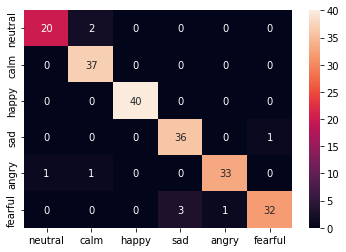

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [22]:
path='/content/drive/My Drive/fusion/fusion_model/SVM/sigmoid/expert3'
savedvX = joblib.dump(model, path)

print("MODEL SAVED")

MODEL SAVED
